In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import pylab as plt
from collections import defaultdict 

In [7]:
dat=pd.read_csv("Data/10122023_jobsplot.csv")
def def_value(): 
    return []

In [8]:
allem=defaultdict(def_value)
for i in dat.columns:
    if ':' in i:
        conc=float(i.split(":")[0])
        allem[conc].append(dat[i])
wls=dat.Wavelength

/var/folders/vy/ll7qjbxx66v846pybl4qyvh80000gs/T/ipykernel_1538/755170478.py:4: RuntimeWarning: divide by zero encountered in power
  return A*x*(1-x)**N


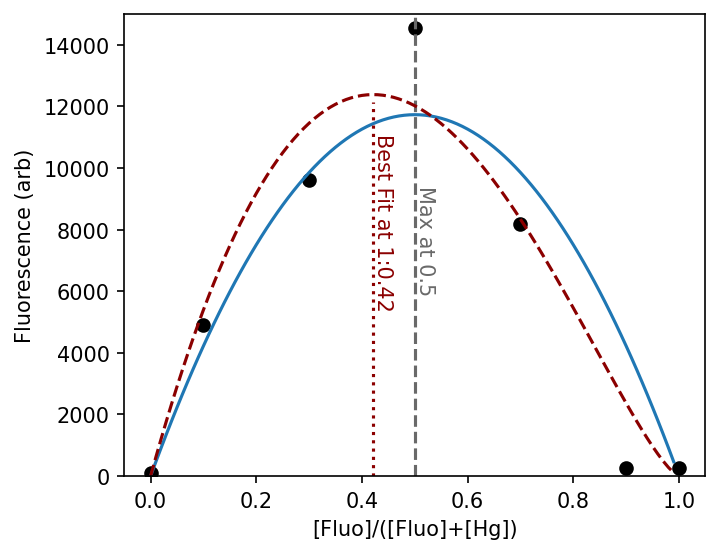

In [14]:
vars=np.arange(0,1,0.01)

def FitFunc(x,A,N):
    return A*x*(1-x)**N

plt.figure(figsize=(5,4),dpi=150)
InsetX=[]
InsetY=[]
for i in allem.keys():
    ave=(np.average(np.array(allem[i]),axis=0))
    sd=(np.std(np.array(allem[i]),axis=0))
    InsetX.append(float(i))
    InsetY.append(sum(ave[wls>450]))
res=curve_fit(FitFunc,InsetX,InsetY,[14000,2],sigma=1400*np.ones_like(InsetX))

plt.plot(InsetX,InsetY,'o',label='Data',color='black')
for N in [1]:
    def FitFuncN(x,A):
        return A*x*(1-x)**N
    res=curve_fit(FitFuncN,InsetX,InsetY,[14000],sigma=1400*np.ones_like(InsetX))
    plt.plot(vars,FitFuncN(vars,res[0][0]),label='1:1')
res2=curve_fit(FitFunc,InsetX,InsetY,[14000,2],sigma=1400*np.ones_like(InsetX))

plt.ylim(0,15000)
plt.plot([0.5,0.5],[0,15000],'--',color='dimgrey')
plt.plot(vars,FitFunc(vars,res2[0][0],res2[0][1]),'--',label='1:1.37 (best fit)',color='DarkRed')
#plt.legend(loc='lower center')
plt.ylabel("Fluorescence (arb)")
plt.xlabel("[Fluo]/([Fluo]+[Hg])")
plt.text(0.5,6000,"Max at 0.5",rotation=270,color='dimgrey')
NearMax=vars[np.argmax(FitFunc(vars,res2[0][0],res2[0][1]))]
plt.plot([NearMax,NearMax],[0,12150],':',color='DarkRed')
Ratio=NearMax/(1-NearMax)
plt.text(NearMax,5500,"Best Fit at 1:"+str(NearMax),rotation=270,color='DarkRed')
plt.savefig("Figs/JobsPlot.png",dpi=150,bbox_inches='tight')